In [804]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
%matplotlib inline

In [805]:
df = pd.read_csv('HRDataset.csv')

In [806]:
df_backup = df.copy()

# General Data Exploration and Preparation

In [807]:
df.sample(7)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,"DeGweck, James",1.306059e+09,1.0,1.0,1.0,5.0,5.0,3.0,0.0,23.5,...,Production,Webster Butler,39.0,Billboard,Fully Meets,5.00,4.0,0.0,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,"Sullivan, Kissy",1.405067e+09,1.0,1.0,0.0,1.0,5.0,3.0,0.0,55.0,...,Production,Janet King,2.0,Billboard,Fully Meets,3.73,4.0,0.0,1/24/2019,0.0
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,"Manchester, Robyn",1.110030e+09,1.0,1.0,0.0,2.0,5.0,3.0,0.0,23.0,...,Production,Webster Butler,NaN,Vendor Referral,Fully Meets,5.00,3.0,0.0,1/21/2019,0.0


In [808]:
df.dtypes

Employee_Name                  object
EmpID                         float64
MarriedID                     float64
MaritalStatusID               float64
GenderID                      float64
EmpStatusID                   float64
DeptID                        float64
PerfScoreID                   float64
FromDiversityJobFairID        float64
PayRate                       float64
Termd                         float64
PositionID                    float64
Position                       object
State                          object
Zip                           float64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [809]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

In [810]:
df[['Employee_Name','DOB']]

,Employee_Name,DOB
0,"Brown, Mia",11/24/87
1,"LaRotonda, William",04/26/84
2,"Steans, Tyrone",09/01/86
3,"Howard, Estelle",09/16/85
4,"Singh, Nan",05/19/88
...,...,...
396,NaN,NaN
397,NaN,NaN
398,NaN,NaN
399,NaN,NaN


In [811]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

In [812]:
erroneous_dobs = df[df['DOB'] > pd.to_datetime('2000-01-01')]
erroneous_dobs['DOB']

6     2064-06-01
7     2063-05-15
12    2054-10-12
22    2063-08-28
31    2068-01-15
32    2065-05-07
54    2066-03-17
57    2064-01-04
61    2068-07-06
73    2054-09-21
74    2068-10-10
87    2055-11-14
91    2067-04-19
101   2065-05-09
102   2065-09-09
112   2067-06-03
115   2068-07-20
116   2067-06-05
146   2068-08-15
155   2064-04-13
157   2068-05-30
159   2061-06-19
160   2068-06-06
164   2058-12-27
175   2065-02-02
184   2066-03-22
195   2051-01-02
200   2059-08-19
213   2055-04-14
215   2052-08-18
231   2064-10-12
235   2058-11-07
242   2067-01-16
247   2063-10-30
248   2053-05-24
249   2066-04-17
250   2051-02-25
279   2052-02-11
298   2066-11-22
303   2064-07-30
305   2052-01-18
308   2065-09-09
Name: DOB, dtype: datetime64[ns]

In [813]:
def correct_dob(row):
    if pd.isnull(row['DOB']):
        return row['DOB']  # Retain NaT if DOB is missing
    elif row['DOB'] < pd.to_datetime('2000-01-01'):
        return row['DOB']
    else:
        try:
            corrected_dob = row['DOB'] - relativedelta(years=100)
            return corrected_dob
        except Exception as e:
            print(f"Error correcting DOB for Employee_ID {row['EmpID']}: {e}")
            return pd.NaT  # Assign NaT if correction fails

In [814]:
df['Correct_DOB'] = df.apply(lambda row: correct_dob(row),axis=1)

In [815]:
df.drop(['DOB'], axis=1, inplace=True)

In [816]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    delta = end_date - row['DateofHire']
    seniority_years = delta.total_seconds() / (365.25 * 24 * 3600)
    return seniority_years

In [817]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [818]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)

In [819]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Zip,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Correct_DOB,Seniority
count,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310,103,302.000000,310.000000,310.000000,310.000000,310,310.000000
mean,1.199745e+09,0.396774,0.809677,0.429032,2.396774,4.606452,2.983871,0.093548,31.284806,0.332258,16.838710,6569.732258,2013-01-27 09:08:07.741935360,2014-01-18 20:16:18.640776704,14.579470,3.332097,3.890323,1.209677,1979-01-26 14:00:46.451612896,4.773355
min,6.020003e+08,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1013.000000,2006-01-09 00:00:00,2010-07-30 00:00:00,1.000000,1.030000,1.000000,0.000000,1951-01-02 00:00:00,0.005476
25%,1.101024e+09,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,20.000000,0.000000,18.000000,1901.250000,2011-07-11 00:00:00,2012-08-31 12:00:00,10.000000,2.082500,3.000000,0.000000,1973-11-30 12:00:00,3.000684
50%,1.203032e+09,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,24.000000,0.000000,19.000000,2132.000000,2013-02-03 12:00:00,2014-03-31 00:00:00,15.000000,3.470000,4.000000,0.000000,1980-09-12 12:00:00,4.992471
75%,1.378814e+09,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,45.315000,1.000000,20.000000,2357.000000,2014-09-10 06:00:00,2015-09-09 12:00:00,19.000000,4.520000,5.000000,0.000000,1986-05-17 18:00:00,6.220397
max,1.988300e+09,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,80.000000,1.000000,30.000000,98052.000000,2017-04-20 00:00:00,2016-06-16 00:00:00,39.000000,5.000000,5.000000,8.000000,1992-08-17 00:00:00,13.713895
std,1.829600e+08,0.490019,0.944702,0.495738,1.795533,1.082349,0.577124,0.291670,15.383615,0.471785,6.232272,16933.864054,NaN,NaN,8.090352,1.290590,0.910690,2.352009,NaN,2.638686


In [820]:
df['Employee_Name'].unique()

array(['Brown, Mia', 'LaRotonda, William  ', 'Steans, Tyrone  ',
       'Howard, Estelle', 'Singh, Nan ', 'Smith, Leigh Ann',
       'Bunbury, Jessica', 'Carter, Michelle ', 'Dietrich, Jenna  ',
       'Digitale, Alfred', 'Friedman, Gerry', 'Gill, Whitney  ',
       'Gonzales, Ricardo', 'Guilianno, Mike', 'Leruth, Giovanni',
       'Mullaney, Howard', 'Ozark, Travis', 'Strong, Caitrin',
       'Valentin,Jackie', 'Villanueva, Noah', 'Buck, Edward',
       'Costa, Latia', 'Fraval, Maruk ', 'Givens, Myriam',
       'Jeremy Prater', 'Khemmich, Bartholemew', 'Martins, Joseph',
       'McKinzie, Jac', 'Nguyen, Dheepa', 'Onque, Jasmine', 'Potts, Xana',
       'Riordan, Michael', 'Terry, Sharlene ', 'Rachael, Maggie',
       'Smith, Jason', 'Westinghouse, Matthew', 'Hubert, Robert',
       'Champaigne, Brian', 'Zamora, Jennifer', 'Roper, Katie',
       'Becker, Renee', 'Goble, Taisha', 'Hernandez, Daniff',
       'Horton, Jayne', 'Johnson, Noelle ', 'Murray, Thomas',
       'Pearson, Randall',

In [821]:
df['Position'].unique()

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Architect',
       'Database Administrator', 'Data Analyst', 'Data Analyst ',
       'Director of Operations', 'Director of Sales', 'IT Director',
       'IT Manager - DB', 'IT Manager - Infra', 'IT Manager - Support',
       'IT Support', 'Network Engineer', 'President & CEO',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Enterprise Architect', 'Principal Data Architect',
       'Sr. Network Engineer'], dtype=object)

In [822]:
df['MaritalDesc'].unique()

array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated'],
      dtype=object)

In [823]:
df['PerformanceScore'].unique()

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement'], dtype=object)

In [824]:
df['ManagerID'].unique()

array([ 1., 17., 21., 13.,  5.,  2.,  4.,  6.,  7.,  9., 11., 12., 14.,
       16., 18., 19., 20., 22., 39., nan, 30., 15., 10.,  3.])

In [825]:
df['ManagerName'].unique()

array(['Brandon R. LeBlanc', 'John Smith', 'Lynn Daneault',
       'Brian Champaigne', 'Jennifer Zamora', 'Janet King', 'Simon Roup',
       'Eric Dougall', 'Peter Monroe', 'Board of Directors', 'Amy Dunn',
       'Brannon Miller', 'David Stanley', 'Elijiah Gray', 'Kelley Spirea',
       'Ketsia Liebig', 'Kissy Sullivan', 'Michael Albert',
       'Webster Butler', 'Debra Houlihan', 'Alex Sweetwater'],
      dtype=object)

In [826]:
df['PerfScoreID'].unique()

array([3., 1., 4., 2.])

In [827]:
df['EmpSatisfaction'].unique()

array([2., 4., 5., 3., 1.])

In [828]:
df['RecruitmentSource'].unique()

array(['Diversity Job Fair', 'Website Banner Ads', 'Internet Search',
       'Pay Per Click - Google', 'Social Networks - Facebook Twitter etc',
       'Billboard', 'Monster.com', 'Newspager/Magazine',
       'Professional Society', 'Other', 'Employee Referral', 'Indeed',
       'Search Engine - Google Bing Yahoo', 'Glassdoor',
       'Vendor Referral', 'MBTA ads', 'Information Session',
       'Word of Mouth', 'Pay Per Click', 'On-campus Recruiting',
       'On-line Web application', 'Careerbuilder',
       'Company Intranet - Partner'], dtype=object)

In [829]:
reference_date = pd.to_datetime('2024-11-11') 
df['Age'] = (reference_date - df['Correct_DOB']).dt.days / 365.25

In [830]:
df['Age']

0      36.966461
1      40.544832
2      38.195756
3      39.154004
4      36.481862
         ...    
305    72.815880
306    38.554415
307    41.754962
308    59.173169
309    46.529774
Name: Age, Length: 310, dtype: float64

In [831]:
df['Age'].min()

np.float64(32.23545516769336)

In [832]:
df['Age'].max()

np.float64(73.8590006844627)

<Axes: xlabel='Age', ylabel='Count'>

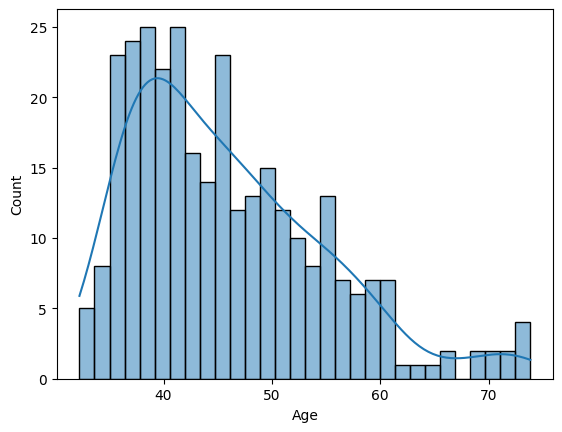

In [833]:
sns.histplot(df['Age'], bins=30, kde=True)

In [834]:
df['SpecialProjectsCount'].unique()

array([6., 4., 5., 0., 7., 3., 2., 8.])

<Axes: >

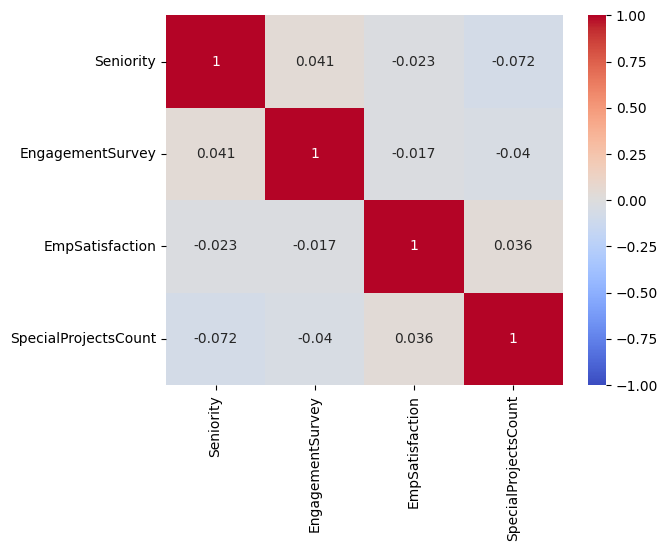

In [835]:
corr_matrix = df[['Seniority', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# 1. Is there a relationship between who is the direct supervisor (ManagerName, ManagerID) of an employee and the employee's performance rating (PerformanceScore)?

In [836]:
df[['ManagerName', 'ManagerID', 'PerformanceScore']].isnull().sum()

ManagerName         0
ManagerID           8
PerformanceScore    0
dtype: int64

In [837]:
df.loc[df['ManagerID'].isnull()]['ManagerName']

210    Webster Butler
211    Webster Butler
220    Webster Butler
221    Webster Butler
275    Webster Butler
276    Webster Butler
277    Webster Butler
278    Webster Butler
Name: ManagerName, dtype: object

In [838]:
existing_manager_id = df.loc[df['ManagerName'] == 'Webster Butler', 'ManagerID'].unique()
existing_manager_id 

array([39., nan])

In [839]:
existing_manager_id = [id for id in existing_manager_id if not pd.isnull(id)]
existing_manager_id

[np.float64(39.0)]

In [840]:
# ManagerID updated for 'Webster Butler' where missing.
if len(existing_manager_id) == 1:
    df.loc[(df['ManagerName'] == 'Webster Butler') & (df['ManagerID'].isnull()), 'ManagerID'] = existing_manager_id[0]
else: 
    print("Multiple or no existing ManagerID found for 'Webster Butler'")

In [841]:
df[['ManagerName', 'ManagerID', 'PerformanceScore']].isnull().sum()

ManagerName         0
ManagerID           0
PerformanceScore    0
dtype: int64

In [842]:
df_clean = df

In [843]:
df_clean[['ManagerName', 'ManagerID', 'PerformanceScore']].dtypes

ManagerName          object
ManagerID           float64
PerformanceScore     object
dtype: object

In [844]:
performance_mapping = {
    'PIP':1,
    'Needs Improvement':2,
    'Fully Meets':3,
    'Exceeds':4
}

df_clean['PerformanceScore_Numeric'] = df_clean['PerformanceScore'].map(performance_mapping)

In [845]:
df_clean

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Correct_DOB,Seniority,Age,PerformanceScore_Numeric
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1987-11-24,10.915811,36.966461,3
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1984-04-26,5.722108,40.544832,3
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1986-09-01,4.993840,38.195756,3
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,1985-09-16,0.158795,39.154004,3
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1988-05-19,4.407940,36.481862,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,1952-01-18,4.878850,72.815880,3
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1986-04-23,4.878850,38.554415,3
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1983-02-09,3.241615,41.754962,3
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1965-09-09,4.878850,59.173169,3


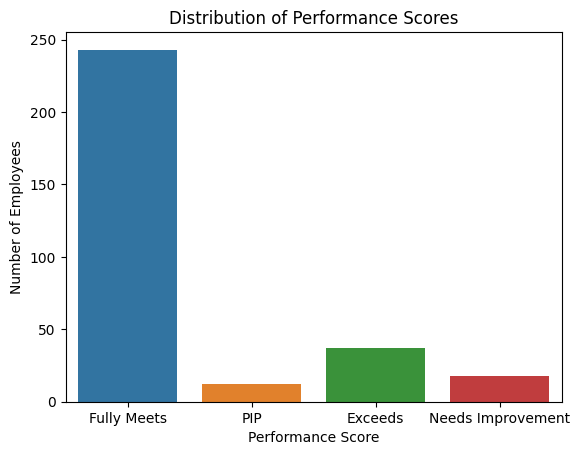

In [846]:
# Count plot of PerformanceScore
sns.countplot(x='PerformanceScore', data=df_clean,hue='PerformanceScore',legend=False)
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Number of Employees')
plt.show()

In [847]:
# Group by ManagerName and calculate average performance score
manager_performance = df_clean.groupby('ManagerName')['PerformanceScore_Numeric'].mean().sort_values(ascending=False)

# Display top 10 managers with highest average performance scores
manager_performance.head(10)

ManagerName
Eric Dougall          3.250000
Jennifer Zamora       3.142857
Simon Roup            3.117647
Alex Sweetwater       3.111111
Janet King            3.105263
Kelley Spirea         3.090909
Ketsia Liebig         3.047619
Brandon R. LeBlanc    3.000000
Board of Directors    3.000000
Webster Butler        3.000000
Name: PerformanceScore_Numeric, dtype: float64

In [848]:
# Display bottom 10 managers with lowest average performance scores
manager_performance.tail(10)

ManagerName
David Stanley       3.000000
Brian Champaigne    3.000000
Elijiah Gray        3.000000
Kissy Sullivan      2.954545
Brannon Miller      2.904762
Amy Dunn            2.904762
Michael Albert      2.863636
Peter Monroe        2.857143
John Smith          2.714286
Debra Houlihan      2.666667
Name: PerformanceScore_Numeric, dtype: float64

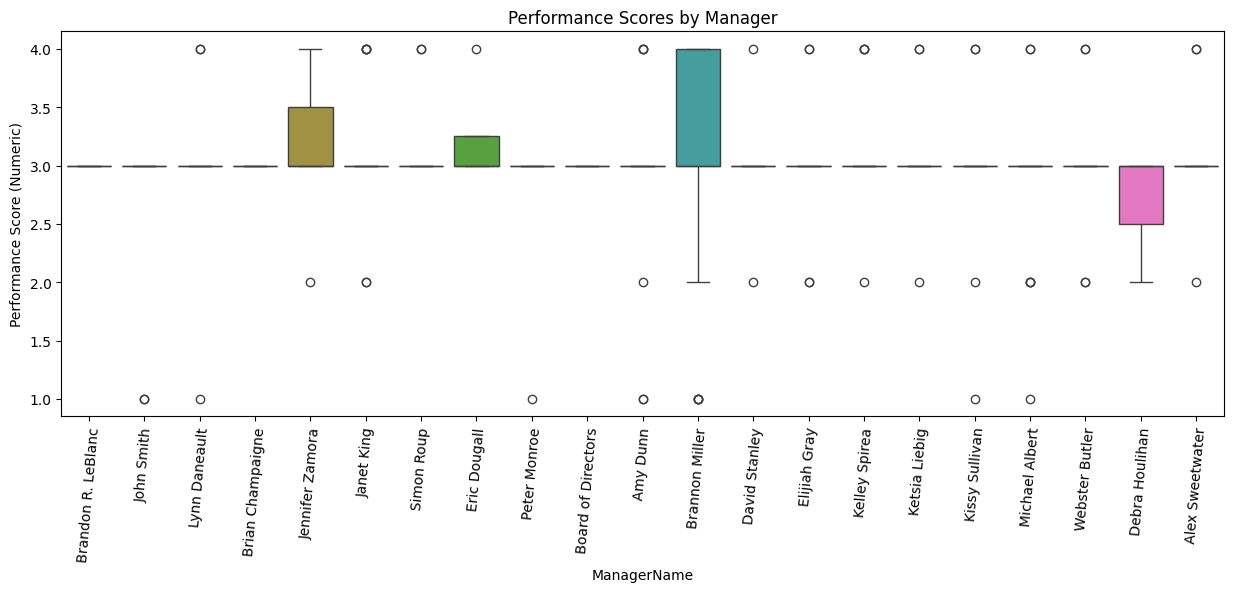

In [849]:
plt.figure(figsize=(15,5))
sns.boxplot(x='ManagerName',y='PerformanceScore_Numeric', data=df_clean,hue='ManagerName',legend=False)
plt.title('Performance Scores by Manager')
plt.xlabel('ManagerName')
plt.ylabel('Performance Score (Numeric)')
plt.xticks(rotation=85)
plt.show()

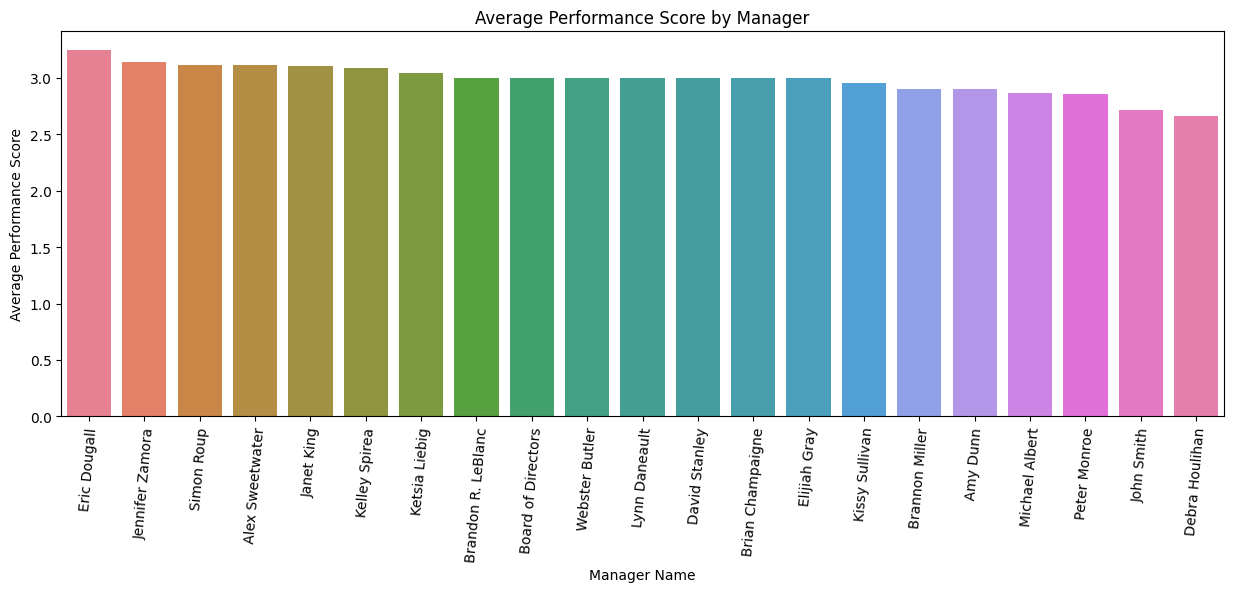

In [850]:
# Calculate average performance score per manager then sort descending
manager_avg_perf = df_clean.groupby('ManagerName')['PerformanceScore_Numeric'].mean().reset_index()
manager_avg_perf = manager_avg_perf.sort_values(by='PerformanceScore_Numeric',ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x='ManagerName',y='PerformanceScore_Numeric',data=manager_avg_perf,hue='ManagerName',legend=False)
plt.title('Average Performance Score by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=85)
plt.show()


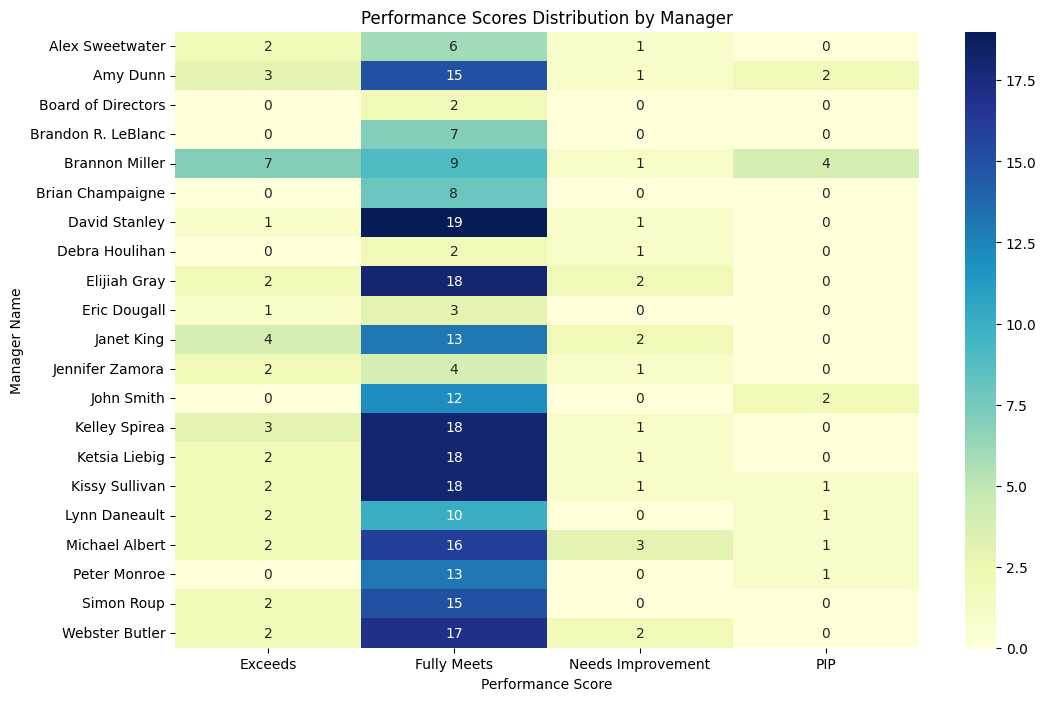

In [851]:
# Provide a visual representation of performance distributions across managers.
pivot_table = df_clean.pivot_table(index='ManagerName',columns='PerformanceScore',aggfunc='size',fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Performance Scores Distribution by Manager')
plt.xlabel('Performance Score')
plt.ylabel('Manager Name')
plt.show()

In [852]:
contingency_table = pd.crosstab(df_clean['ManagerName'],df_clean['PerformanceScore'])
contingency_table

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2,6,1,0
Amy Dunn,3,15,1,2
Board of Directors,0,2,0,0
Brandon R. LeBlanc,0,7,0,0
Brannon Miller,7,9,1,4
Brian Champaigne,0,8,0,0
David Stanley,1,19,1,0
Debra Houlihan,0,2,1,0
Elijiah Gray,2,18,2,0


In [853]:
# Chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 66.95837890067335
P-value: 0.2506223273538967
Degrees of Freedom: 60


### P-Value of 0.25 is greater than 0.05, therefore, there is no significant association between ManagerName and PerformanceScore.

In [854]:
# Preparation of data for ANOVA calculation
grouped = df_clean.groupby('ManagerName')['PerformanceScore_Numeric'].apply(list)

In [855]:
# Extract performance score lists
performance_groups = [group for group in grouped]

# ANOVA calc
f_stat, p_val = f_oneway(*performance_groups)
print(f"F-Statistic: {f_stat}")
print(f"P-value: {p_val}")

F-Statistic: 0.5382497958946765
P-value: 0.9488884328406775


### P-value 0.95 is greater than 0.05, therefore, there is no significant differences in mean performance scores across managers.

### Conclusion: There is no visual nor statistical evidence to suggest that the direct supervisor influences the employee's performance rating. Other factors should be examined, for example, a managerial style.

# 2. Which employee recruitment sources are the best if we aim for the longest employee tenure?

In [856]:
df_clean[['RecruitmentSource','Seniority']].isnull().sum()

RecruitmentSource    0
Seniority            0
dtype: int64

In [857]:
df_clean[['RecruitmentSource','Seniority']].dtypes

RecruitmentSource     object
Seniority            float64
dtype: object

In [858]:
df_clean['RecruitmentSource'] = df['RecruitmentSource'].str.strip().str.title()

In [859]:
recruitment_counts = df_clean['RecruitmentSource'].value_counts()
recruitment_counts

RecruitmentSource
Employee Referral                         31
Diversity Job Fair                        29
Search Engine - Google Bing Yahoo         25
Monster.Com                               24
Pay Per Click - Google                    21
Professional Society                      20
Newspager/Magazine                        18
Mbta Ads                                  17
Billboard                                 16
Vendor Referral                           15
Glassdoor                                 14
Website Banner Ads                        13
Word Of Mouth                             13
On-Campus Recruiting                      12
Social Networks - Facebook Twitter Etc    11
Other                                      9
Indeed                                     8
Internet Search                            6
Information Session                        4
Pay Per Click                              1
On-Line Web Application                    1
Careerbuilder                        

In [860]:
# Aggregate low-frequency sources into 'Other'
threshold = 4
df_clean['RecruitmentSource'] = df_clean['RecruitmentSource'].apply(
    lambda x: x if recruitment_counts[x] >= threshold else 'Other'
)

In [861]:
recruitment_counts

RecruitmentSource
Employee Referral                         31
Diversity Job Fair                        29
Search Engine - Google Bing Yahoo         25
Monster.Com                               24
Pay Per Click - Google                    21
Professional Society                      20
Newspager/Magazine                        18
Mbta Ads                                  17
Billboard                                 16
Vendor Referral                           15
Glassdoor                                 14
Website Banner Ads                        13
Word Of Mouth                             13
On-Campus Recruiting                      12
Social Networks - Facebook Twitter Etc    11
Other                                      9
Indeed                                     8
Internet Search                            6
Information Session                        4
Pay Per Click                              1
On-Line Web Application                    1
Careerbuilder                        

In [862]:
# Calculate average Seniority per Recruitment Source
recruitment_seniority = df_clean.groupby('RecruitmentSource')['Seniority'].mean().sort_values(ascending=False)
recruitment_seniority

RecruitmentSource
Billboard                                 5.862765
Mbta Ads                                  5.729516
Website Banner Ads                        5.721476
Information Session                       5.623546
Professional Society                      5.437645
Other                                     5.254778
Employee Referral                         5.025899
Pay Per Click - Google                    5.009354
On-Campus Recruiting                      5.006388
Monster.Com                               4.834816
Internet Search                           4.711385
Newspager/Magazine                        4.593201
Diversity Job Fair                        4.492247
Search Engine - Google Bing Yahoo         4.360192
Glassdoor                                 4.155080
Vendor Referral                           4.143463
Word Of Mouth                             3.647238
Social Networks - Facebook Twitter Etc    3.464626
Indeed                                    2.676249
Name: Seniori

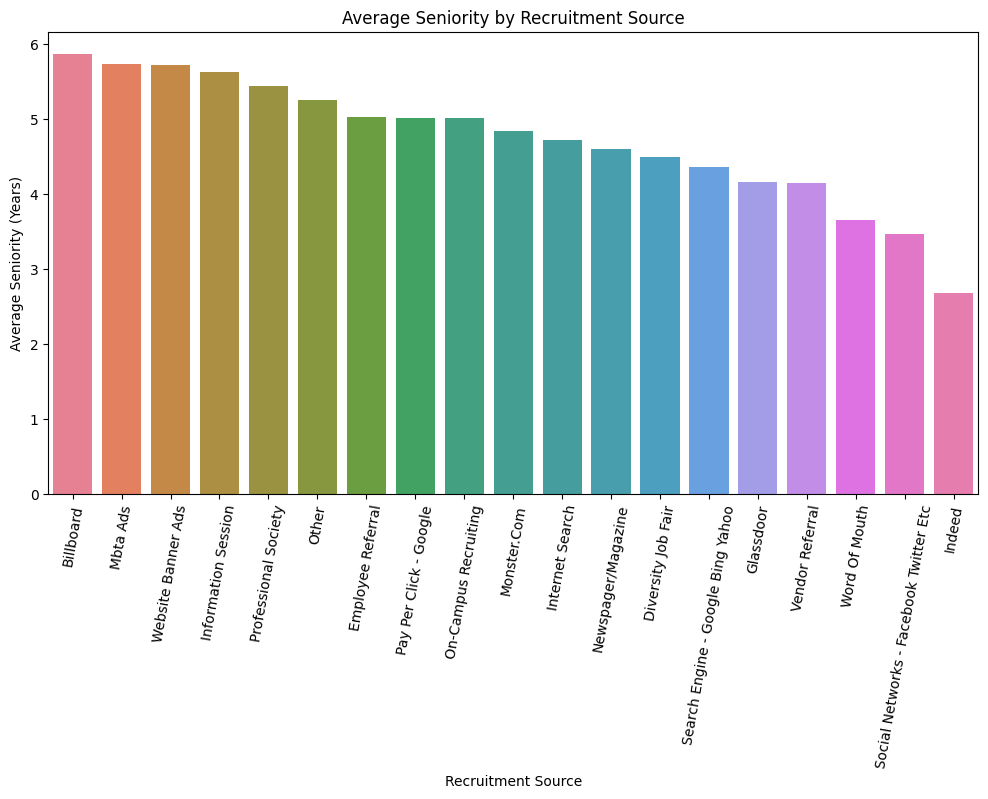

In [863]:
plt.figure(figsize=(12,6))
sns.barplot(x=recruitment_seniority.index,y=recruitment_seniority.values,hue=recruitment_seniority.index,legend=False)
plt.title('Average Seniority by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Average Seniority (Years)')
plt.xticks(rotation=80)
plt.show()

### Conclusion: barplot shows that the top three recruitment sources resulting in the longest tenure were: billboard, mbta ads and website banner ads, which resulted in almost 6 years of average tenure. On the other hand, the least effective were: indeed, social networks, and word-of-mouth, which resulted in about 2.5-3.5 years of tenure.

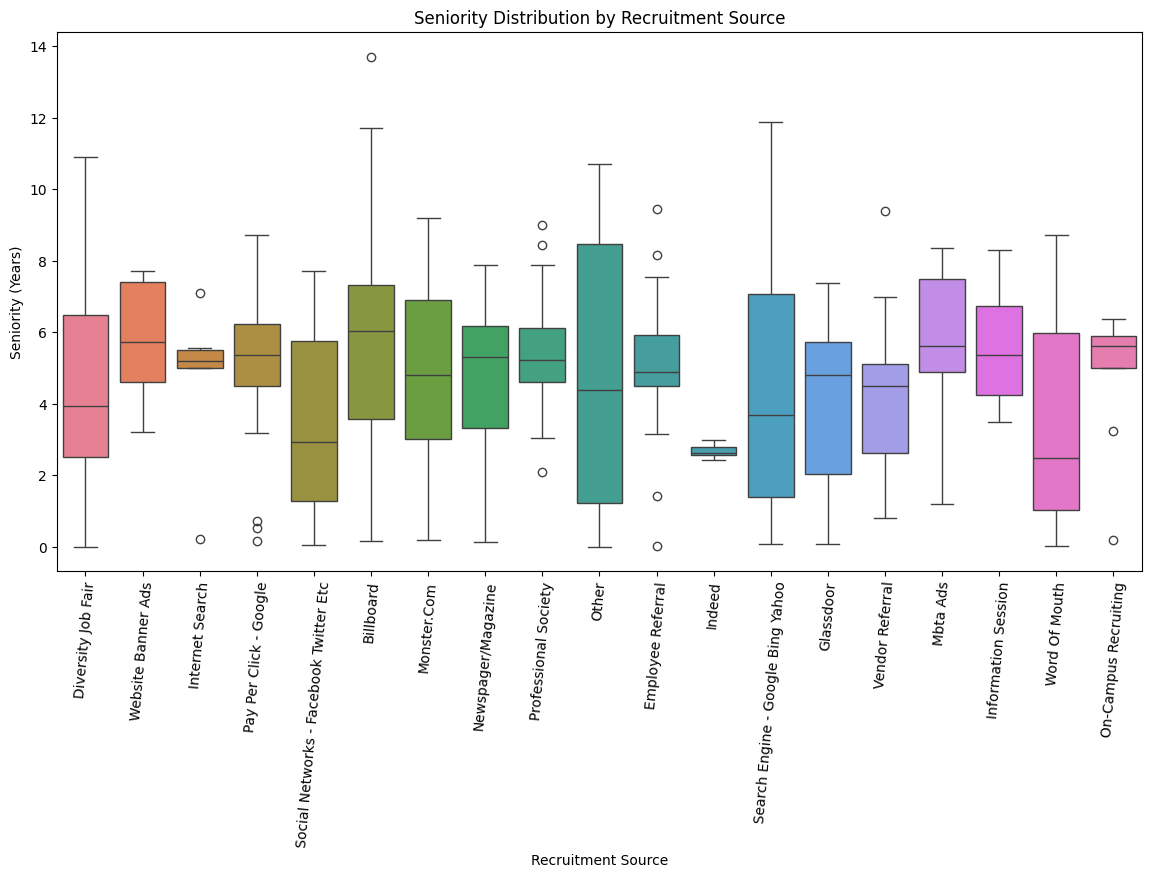

In [864]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='RecruitmentSource',y='Seniority', data=df_clean,hue='RecruitmentSource',legend=False)
plt.title('Seniority Distribution by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Seniority (Years)')
plt.xticks(rotation=85)
plt.show()

### Conclusion: boxplot shows that recruitment sources result in different lengths of tenure spans: other, search engine, social networks, and word-of-mouth have 4-6 year tenure time span for 50% of employees (Q1 to Q3), which means that these sources are not very predictive of the potential tenure. Indeed, on-campus, and internet are most predictive sources.

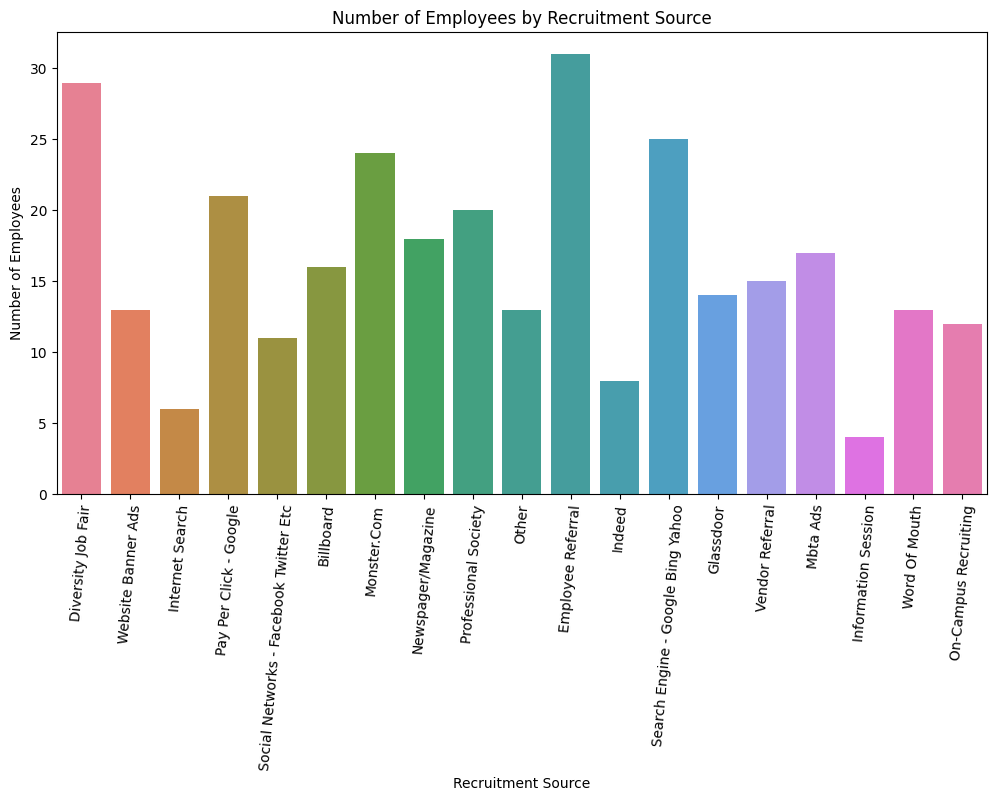

In [865]:
plt.figure(figsize=(12, 6))
sns.countplot(x='RecruitmentSource',data=df_clean,hue='RecruitmentSource',legend=False)
plt.title('Number of Employees by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Number of Employees')
plt.xticks(rotation=85)
plt.show()

### Conclusion: there is a wide difference between recruitment sources resulting in a number of employees employed: employee referral resulted in about 30 employees, while information session in about 5 employees. The lower the count the less conclusive the source on tenure length is.

In [866]:
grouped = df_clean.groupby('RecruitmentSource')['Seniority'].apply(list)

# ANOVA calc
f_stat, p_val = f_oneway(*grouped)

print(f"ANOVA F-Statistic: {f_stat}")
print(f"ANOVA P-value: {p_val}")

ANOVA F-Statistic: 1.2448020064826308
ANOVA P-value: 0.2244329014157485


### Since P-value of 0.22 is greater than 0.05, no significant differences in average tenure across recruitment sources can be determined.

# 3. Does marital status correlate with employee satifaction?

In [867]:
df_clean[['MaritalDesc', 'EmpSatisfaction']].isnull().sum()

MaritalDesc        0
EmpSatisfaction    0
dtype: int64

In [868]:
df_clean[['MaritalDesc', 'EmpSatisfaction']].dtypes

MaritalDesc         object
EmpSatisfaction    float64
dtype: object

In [869]:
df_clean['MaritalDesc'] = df_clean['MaritalDesc'].str.strip().str.title()

In [870]:
df_clean['MaritalDesc'].unique()

array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated'],
      dtype=object)

In [871]:
df_clean['EmpSatisfaction'].unique()

array([2., 4., 5., 3., 1.])

In [872]:

marital_satifaction = df_clean.groupby('MaritalDesc')['EmpSatisfaction'].mean().sort_values(ascending=False)
marital_satifaction

MaritalDesc
Widowed      4.250000
Divorced     4.033333
Single       3.970803
Separated    3.833333
Married      3.747967
Name: EmpSatisfaction, dtype: float64

### Average satisfaction is highest within the widowed, while lowest within the married. 

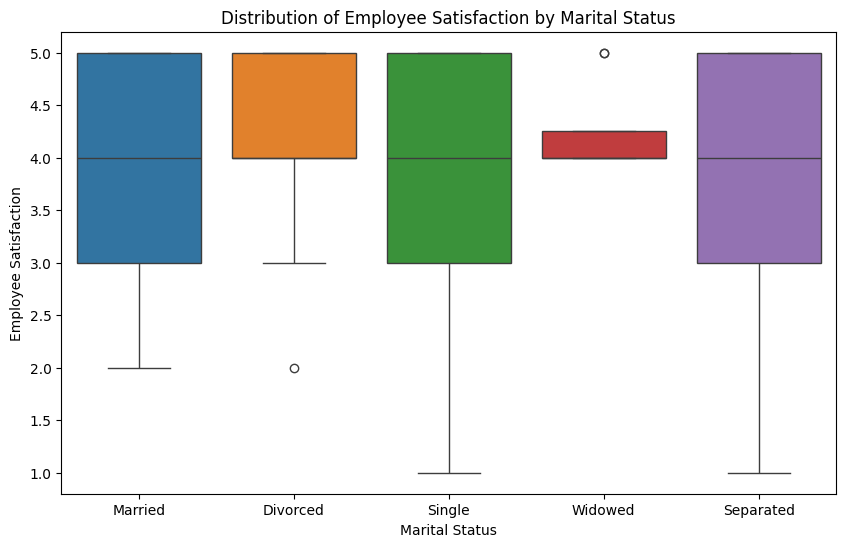

In [873]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalDesc', y='EmpSatisfaction', data=df_clean, hue='MaritalDesc', legend=False)
plt.title('Distribution of Employee Satisfaction by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Employee Satisfaction')
plt.show()

### The smallest differences between the degree of satisfaction are within the widowed and the divorced, while the degree of satisfaction varies more within the other three marital categories. 

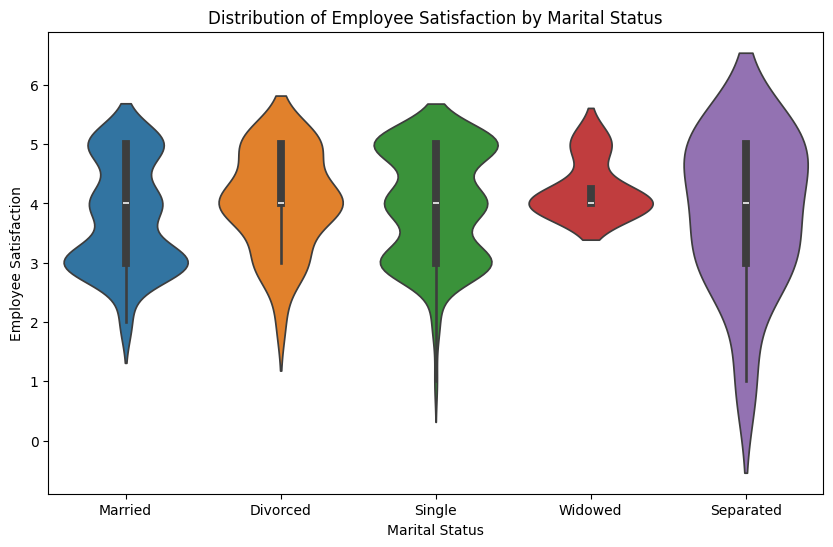

In [874]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='MaritalDesc', y='EmpSatisfaction', data=df_clean, hue='MaritalDesc', legend=False)
plt.title('Distribution of Employee Satisfaction by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Employee Satisfaction')
plt.show()

### Violinplot confirms that the smallest distribution is within the widowed. Moreover, the separated have the largest distribution of employee satisfaction, followed by the single.

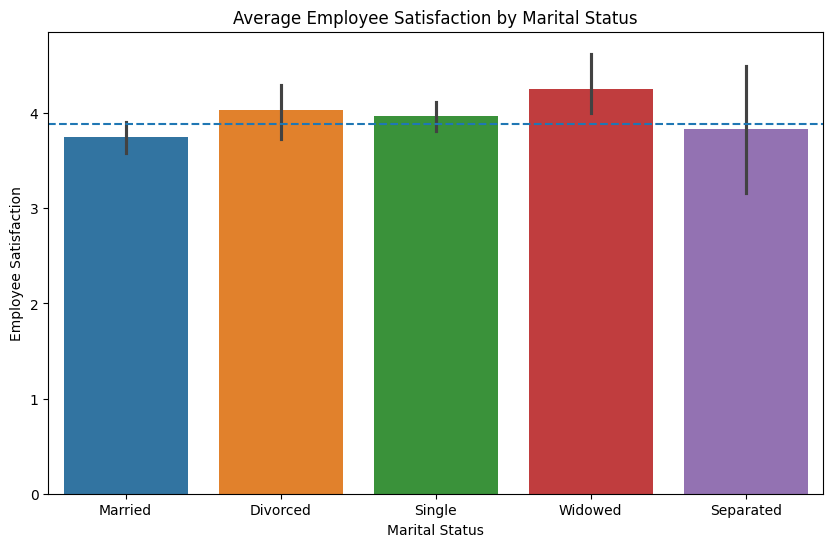

In [875]:
avg_satisfaction = df_clean['EmpSatisfaction'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x='MaritalDesc', y='EmpSatisfaction', data=df_clean, hue='MaritalDesc', legend=False)
plt.axhline(y=avg_satisfaction, ls='--')
plt.title('Average Employee Satisfaction by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Employee Satisfaction')
plt.show()

### Barplot shows that the widowed show the highest level of employee satisfaction, while the separated show the highest degree of different levels of employee satisfaction.

In [876]:
marital_counts = df_clean['MaritalDesc'].value_counts()
marital_counts

MaritalDesc
Single       137
Married      123
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

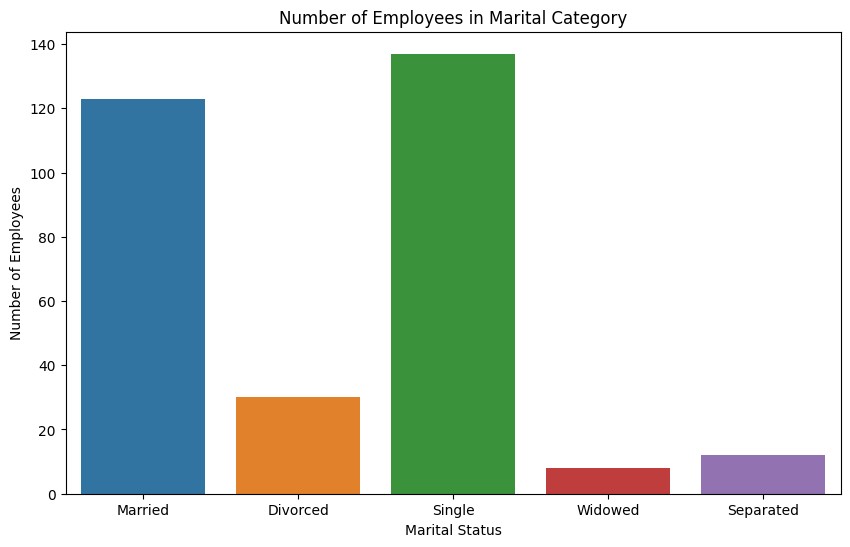

In [877]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalDesc', data=df_clean, hue='MaritalDesc',legend=False)
plt.title('Number of Employees in Marital Category')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.show()

### Significantly higher number of employees are married or single compared to the number of widowed or separated employees. The low representation of the widowed or separated make the analysis inconclusive about their impact on the level of employee satisfaction compared to other marital categories. 

In [878]:
grouped = df_clean.groupby('MaritalDesc')['EmpSatisfaction'].apply(list)

# ANOVA calc
f_stat, p_val = f_oneway(*grouped)
print(f"ANOVA F-Statistic: {f_stat}")
print(f"ANOVA P-value: {p_val}")

ANOVA F-Statistic: 1.5381614759868525
ANOVA P-value: 0.19098788812911743


### P-value of 0.19 is greater than 0.05, therefore, there is no significant association between marital status and employee satisfaction.

In [879]:
# OHE
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['MaritalDesc'],drop_first=False)],axis=1)
df_clean.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'Correct_DOB', 'Seniority', 'Age',
       'PerformanceScore_Numeric', 'Divorced', 'Married', 'Separated',
       'Single', 'Widowed'],
      dtype='object')

In [882]:
# Pearson Correlation after one-hot encoding
correlations = df_clean[['Married', 'Divorced', 'Widowed', 'Separated','EmpSatisfaction']].corr()
correlations

,Married,Divorced,Widowed,Separated,EmpSatisfaction
Married,1.000000,-0.265469,-0.132000,-0.162747,-0.126980
Divorced,-0.265469,1.000000,-0.053275,-0.065685,0.051485
Widowed,-0.132000,-0.053275,1.000000,-0.032661,0.064385
Separated,-0.162747,-0.065685,-0.032661,1.000000,-0.012578
EmpSatisfaction,-0.126980,0.051485,0.064385,-0.012578,1.000000


### No significant linear regression can be inferred from the data, as all four categories of the marital status have a correlation coefficient close to zero. Being married or  separated is slightly related to a lower level of employee satisfaction, while being divorced and widowed slightly correlates to a higher level of employee satisfaction. The conclusions are visually presented on a heatmap below:

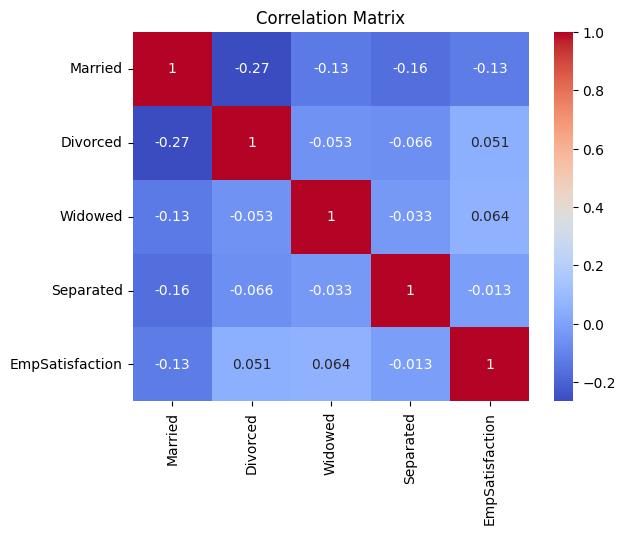

In [883]:
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. What is the age structure of currently employed employees?

In [888]:
current_employees = df_clean[df_clean['DateofTermination'].isnull()].copy()
print(f"Total currently employed employees: {len(current_employees)}")

Total currently employed employees: 207


In [890]:
age_stats = current_employees['Age'].describe()
age_stats

count    207.000000
mean      45.184273
std        8.365494
min       32.235455
25%       38.386037
50%       43.578371
75%       49.979466
max       73.859001
Name: Age, dtype: float64

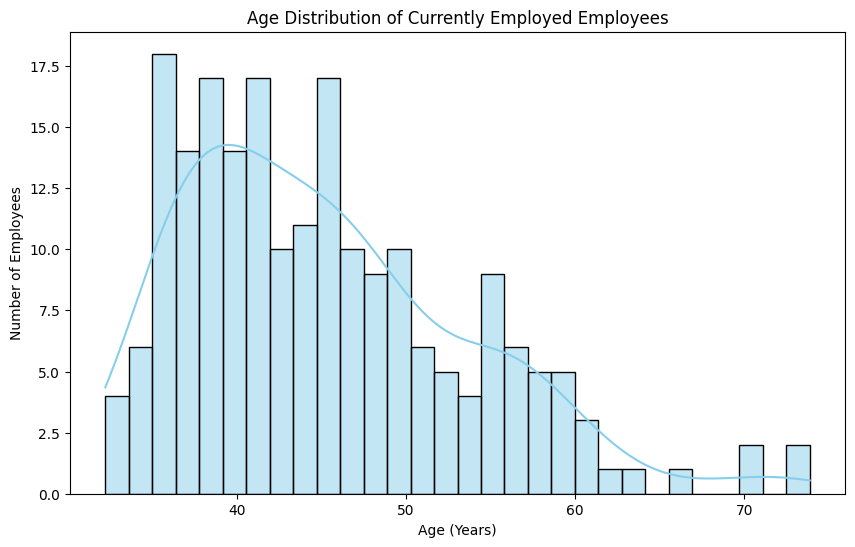

In [891]:
plt.figure(figsize=(10, 6))
sns.histplot(current_employees['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Currently Employed Employees')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Employees')
plt.show()

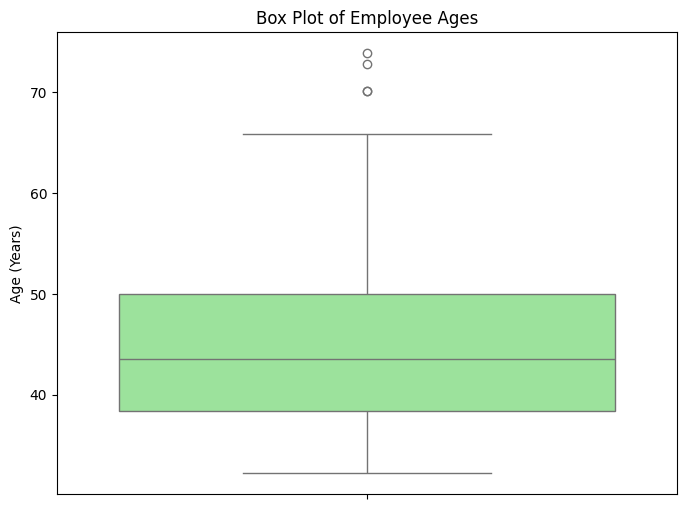

In [892]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=current_employees['Age'], color='lightgreen')
plt.title('Box Plot of Employee Ages')
plt.ylabel('Age (Years)')
plt.show()

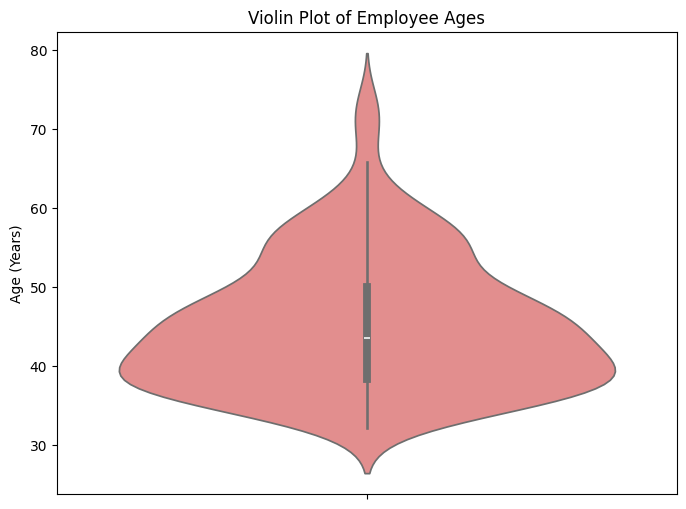

In [893]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=current_employees['Age'], color='lightcoral')
plt.title('Violin Plot of Employee Ages')
plt.ylabel('Age (Years)')
plt.show()

In [895]:
# Employees within age groups

age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

current_employees['AgeGroup'] = pd.cut(current_employees['Age'], bins=age_bins, labels=age_labels, right=False)

print(current_employees['AgeGroup'].value_counts())

AgeGroup
35-44    104
45-54     62
55-64     26
25-34     10
18-24      0
Name: count, dtype: int64


/tmp/ipykernel_861608/3876722184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=current_employees, palette='Pastel1')


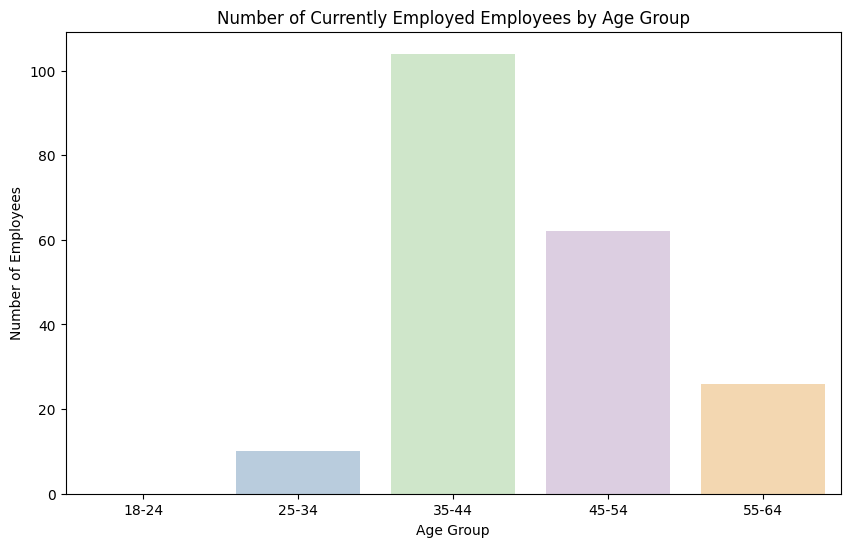

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=current_employees, palette='Pastel1')
plt.title('Number of Currently Employed Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

### Age structure of the currently employed:
- total of 207 employees
- average employee is 45 years and 2 months old
- the youngest employee is about 32 years old
- the oldest employee is almost 74
- two thirds of employees are between almost 37 years old and almost 54 years old
- one fourth of employees are below 32 years and 4 months old
- the median age is 43 years and 7 months old
- 3/4 of employees are blow 50 years old
- the most numerous age group is between 35-44, followed by older age groups: 45-54 and 55-64


# 5. Do older employees work on a greater number of special projects than younger employees?

In [899]:
df_clean[['Age', 'SpecialProjectsCount']].isnull().sum()

Age                     0
SpecialProjectsCount    0
dtype: int64

In [900]:
df_clean[['Age', 'SpecialProjectsCount']].dtypes

Age                     float64
SpecialProjectsCount    float64
dtype: object

In [903]:
# Create age groups for all employees (including terminated)
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

df_clean['AgeGroups_All'] = pd.cut(df_clean['Age'],bins=age_bins, labels=age_labels, right=False)

df_clean['AgeGroups_All'].value_counts()

AgeGroups_All
35-44    153
45-54     96
55-64     36
25-34     12
18-24      0
Name: count, dtype: int64

In [904]:
df_clean[['Age', 'SpecialProjectsCount']].describe()

,Age,SpecialProjectsCount
count,310.000000,310.000000
mean,45.791694,1.209677
std,8.887184,2.352009
min,32.235455,0.000000
25%,38.486653,0.000000
50%,44.162902,0.000000
75%,50.947296,0.000000
max,73.859001,8.000000


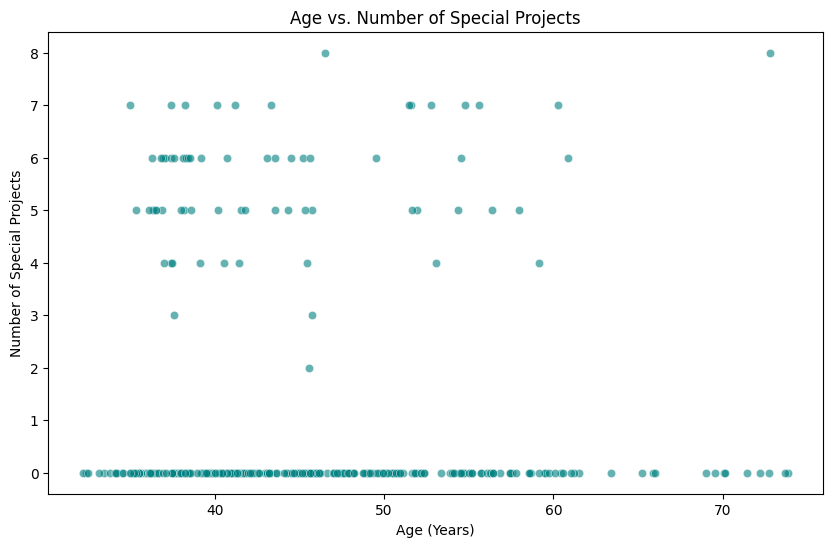

In [905]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='SpecialProjectsCount', data=df_clean, alpha=0.6, color='teal')
plt.title('Age vs. Number of Special Projects')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Special Projects')
plt.show()

### No clear correlation between the age and the number of special projects can be visually noticed.

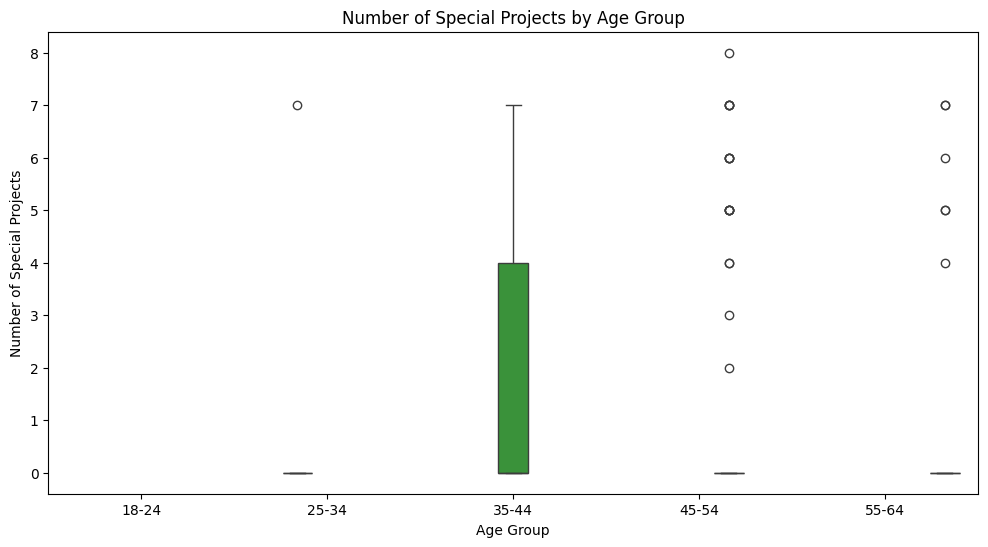

In [908]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeGroups_All', y='SpecialProjectsCount', data=df_clean, hue='AgeGroups_All',legend=False)
plt.title('Number of Special Projects by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Special Projects')
plt.show()

### The largest distribution of the number of special projects is within 35-44 age group. The other age groups do not expouse visible distribution. 

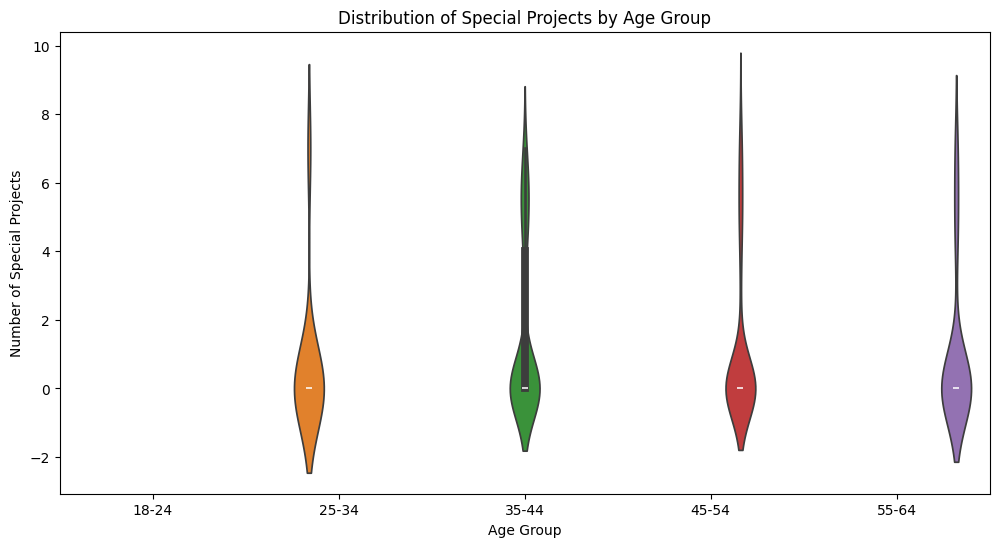

In [910]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='AgeGroups_All', y='SpecialProjectsCount', data=df_clean, hue='AgeGroups_All',legend=False)
plt.title('Distribution of Special Projects by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Special Projects')
plt.show()